## EXPLORATORY DATA ANALYSIS (filtered for patients with a minimum of 7 weeks)

This notebook takes the cleaned data and does an exploratory data analysis (EDA) to know more about the dataset.
Python modules needed are imported here:

In [3]:
import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from scipy.stats import spearmanr

### 1) Descriptive statistics

We will start doing a quick analysis on each of the variables:

In [4]:
df = pd.read_csv("data/old/7week_v2.csv") # Need data with NaN values!

In [5]:
df.head()

,patient_id,week,score,gender,birthdate,Alternating Attention,Attention,Auditory Gnosis,Body Schema,Comprehension,...,Spatial Visualization,Sustained Attention,Time Estimation,Time Orientation,Visoconstructive Praxis,Visual Gnosis,Visuospatial Skills,Vocabulary,Working M.,Writing
0,1,26-2014,0.572233,1,1963-05-20,NaN,0.800000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,27-2014,0.703333,1,1963-05-20,NaN,0.703333,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,28-2014,0.628350,1,1963-05-20,NaN,0.800000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.54,NaN,0.8,0.0,0.65
3,1,29-2014,0.000000,1,1963-05-20,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,31-2014,0.576000,1,1963-05-20,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.describe(include='all') # include='all' for more info

,patient_id,week,score,gender,birthdate,Alternating Attention,Attention,Auditory Gnosis,Body Schema,Comprehension,...,Spatial Visualization,Sustained Attention,Time Estimation,Time Orientation,Visoconstructive Praxis,Visual Gnosis,Visuospatial Skills,Vocabulary,Working M.,Writing
count,393108.000000,393108,393108.000000,393108.000000,392657,67054.000000,345283.000000,14450.000000,27866.000000,73174.000000,...,27471.000000,258720.000000,17519.000000,19241.000000,26650.000000,144243.000000,156389.000000,169631.000000,297782.000000,7180.000000
unique,NaN,521,NaN,NaN,8199,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,18-2018,NaN,NaN,2017-11-21,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1839,NaN,NaN,634,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8438.744602,NaN,0.422858,1.454483,NaN,0.235500,0.420404,0.241725,0.377448,0.404463,...,0.417594,0.390867,0.585940,0.840766,0.229426,0.516499,0.347355,0.432260,0.367781,0.426948
std,5596.496768,NaN,0.185504,0.497925,NaN,0.257102,0.217605,0.198313,0.287941,0.232825,...,0.279581,0.255869,0.272104,0.224692,0.200680,0.255638,0.223824,0.242215,0.231037,0.262159
min,1.000000,NaN,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3446.000000,NaN,0.289946,1.000000,NaN,0.024700,0.253000,0.099687,0.148300,0.212717,...,0.200000,0.181700,0.391500,0.760000,0.097200,0.321050,0.182800,0.238858,0.190000,0.206450
50%,8014.000000,NaN,0.415550,1.000000,NaN,0.133400,0.405000,0.197200,0.276100,0.376600,...,0.383900,0.351650,0.566300,0.921700,0.173725,0.500000,0.311400,0.400000,0.330445,0.400000
75%,13406.000000,NaN,0.544800,2.000000,NaN,0.385375,0.569100,0.323300,0.595000,0.559500,...,0.600000,0.563450,0.830000,1.000000,0.308900,0.700233,0.471800,0.600000,0.510650,0.600000


All scores are between 0 and 1. 

In [7]:
len(df['patient_id'].unique())

10113

Now the number of patients is 10113.

### 2) Gender and age distributions

In [8]:
gender_dist = df.drop_duplicates(subset='patient_id')['gender'].value_counts()
gender_dist

gender
1    5660
2    4453
Name: count, dtype: int64

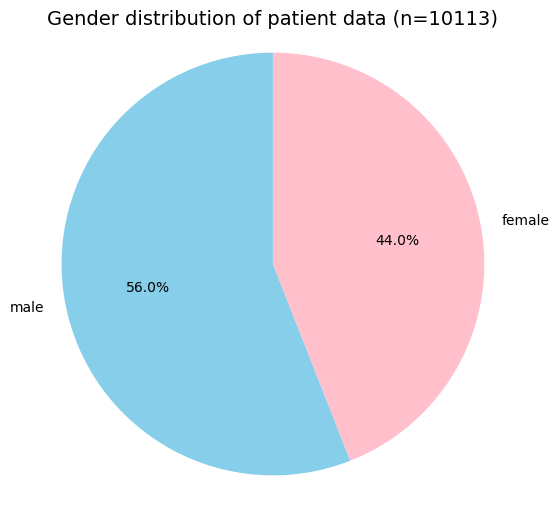

In [18]:
# GENDER DISTRIBUTION
gender_labels = ['male', 'female']
gender_counts = gender_dist.values

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels= gender_labels, autopct='%1.1f%%', startangle=90, colors= ['skyblue','pink'])
plt.title('Gender distribution of patient data (n=10113)', fontsize=14)
plt.axis('equal') # Circle
plt.savefig("Gender_7.png")
plt.show()

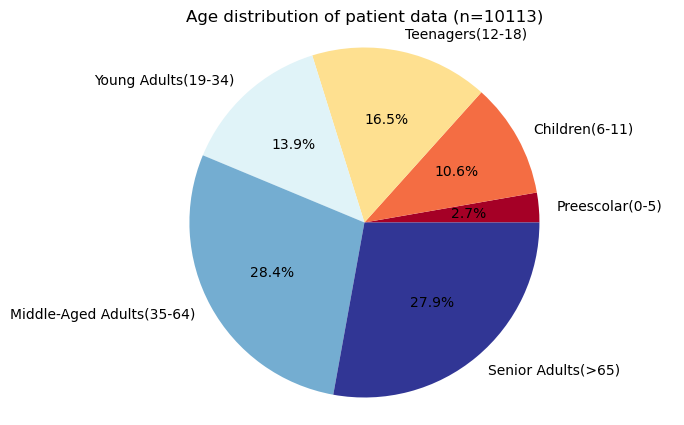

In [10]:
# AGE DISTRIBUTION
# current_date = datetime.datetime(2023, 10, 26)
current_year = 2023
df2 = df.copy()
df2['birth_year'] = pd.to_datetime(df2['birthdate']).dt.year

df2["age"] = current_year - df2['birth_year']
bins = [0, 5, 11, 18, 35, 65, 130]
labels = ['Preescolar(0-5)', 'Children(6-11)', 'Teenagers(12-18)', 'Young Adults(19-34)', 'Middle-Aged Adults(35-64)', 'Senior Adults(>65)']


df2['age_group'] = pd.cut(df2['age'], bins=bins, labels=labels)

age_dist = df2.drop_duplicates(subset='patient_id')['age_group'].value_counts()

# age_labels = age_dist.index
age_counts = age_dist.reindex(labels, fill_value=0).values

colors = plt.get_cmap('RdYlBu', len(labels))
plt.figure(figsize=(8, 5))
plt.pie(age_counts, labels= labels, autopct='%1.1f%%', startangle=0, colors= colors(np.arange(len(labels))))
plt.title('Age distribution of patient data (n=10113)')
plt.axis('equal') # Circle
plt.savefig("age_7.png")
plt.show()

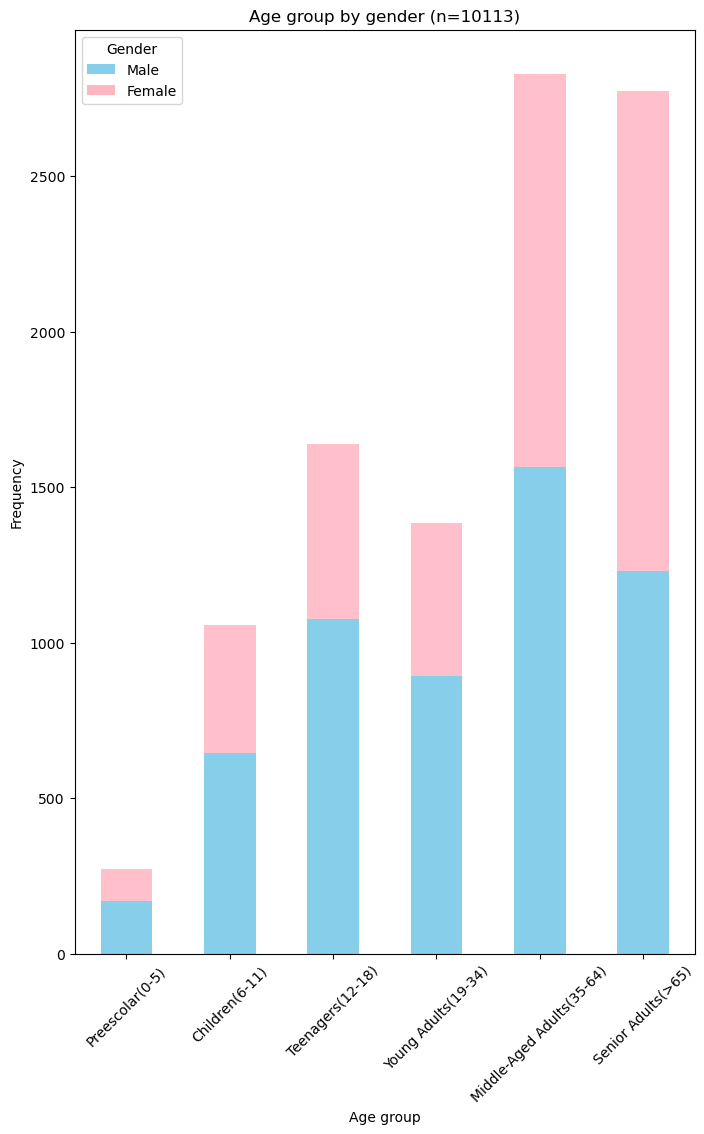

In [11]:
# GENDER AND AGE COMBINATION

unique_patient_data = df2.drop_duplicates(subset='patient_id')
grouped_data = unique_patient_data.groupby(['age_group', 'gender'],observed=True).size().unstack(fill_value=0)

ax = grouped_data.plot(kind= 'bar', stacked = True, figsize=(8,12), color=['skyblue', 'pink'])

plt.title("Age group by gender (n=10113)")
plt.xlabel('Age group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

male_patch = plt.bar(0, 0, color='skyblue', label='Male')
female_patch = plt.bar(0, 0, color='lightpink', label='Female')
ax.legend(handles=[male_patch, female_patch], title='Gender')

plt.savefig("agegender_7.png")
plt.show()

### 3) Score distributions

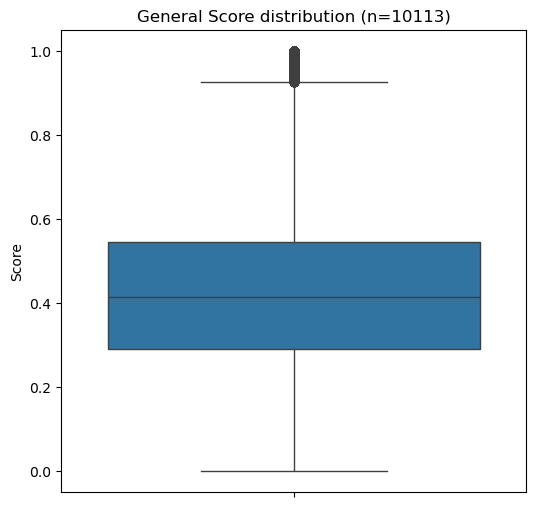

In [12]:
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

# GENERAL SCORE BOXPLOT
plt.figure(figsize=(6, 6))
sns.boxplot(y='score', data=df)
plt.title('General Score distribution (n=10113)')
plt.ylabel('Score')
plt.savefig("score_7.png")
plt.show()
                

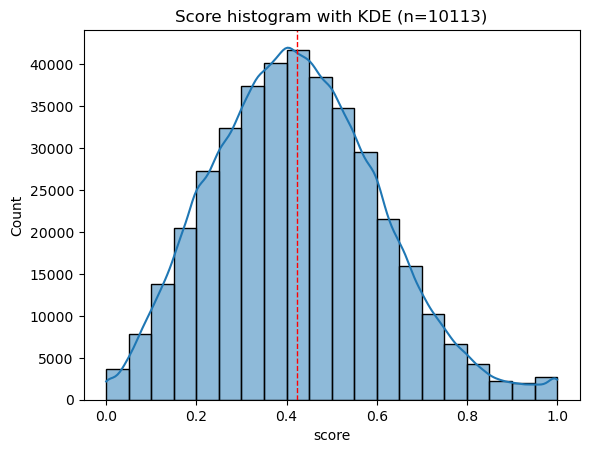

In [13]:
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

# SCORE DISTRIBUTION PLOT
sns.histplot(df['score'], kde=True, bins=20)
plt.title("Score histogram with KDE (n=10113)")
mean_value = df['score'].mean()
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1)

# plt.savefig("kde_7.png")

plt.show()

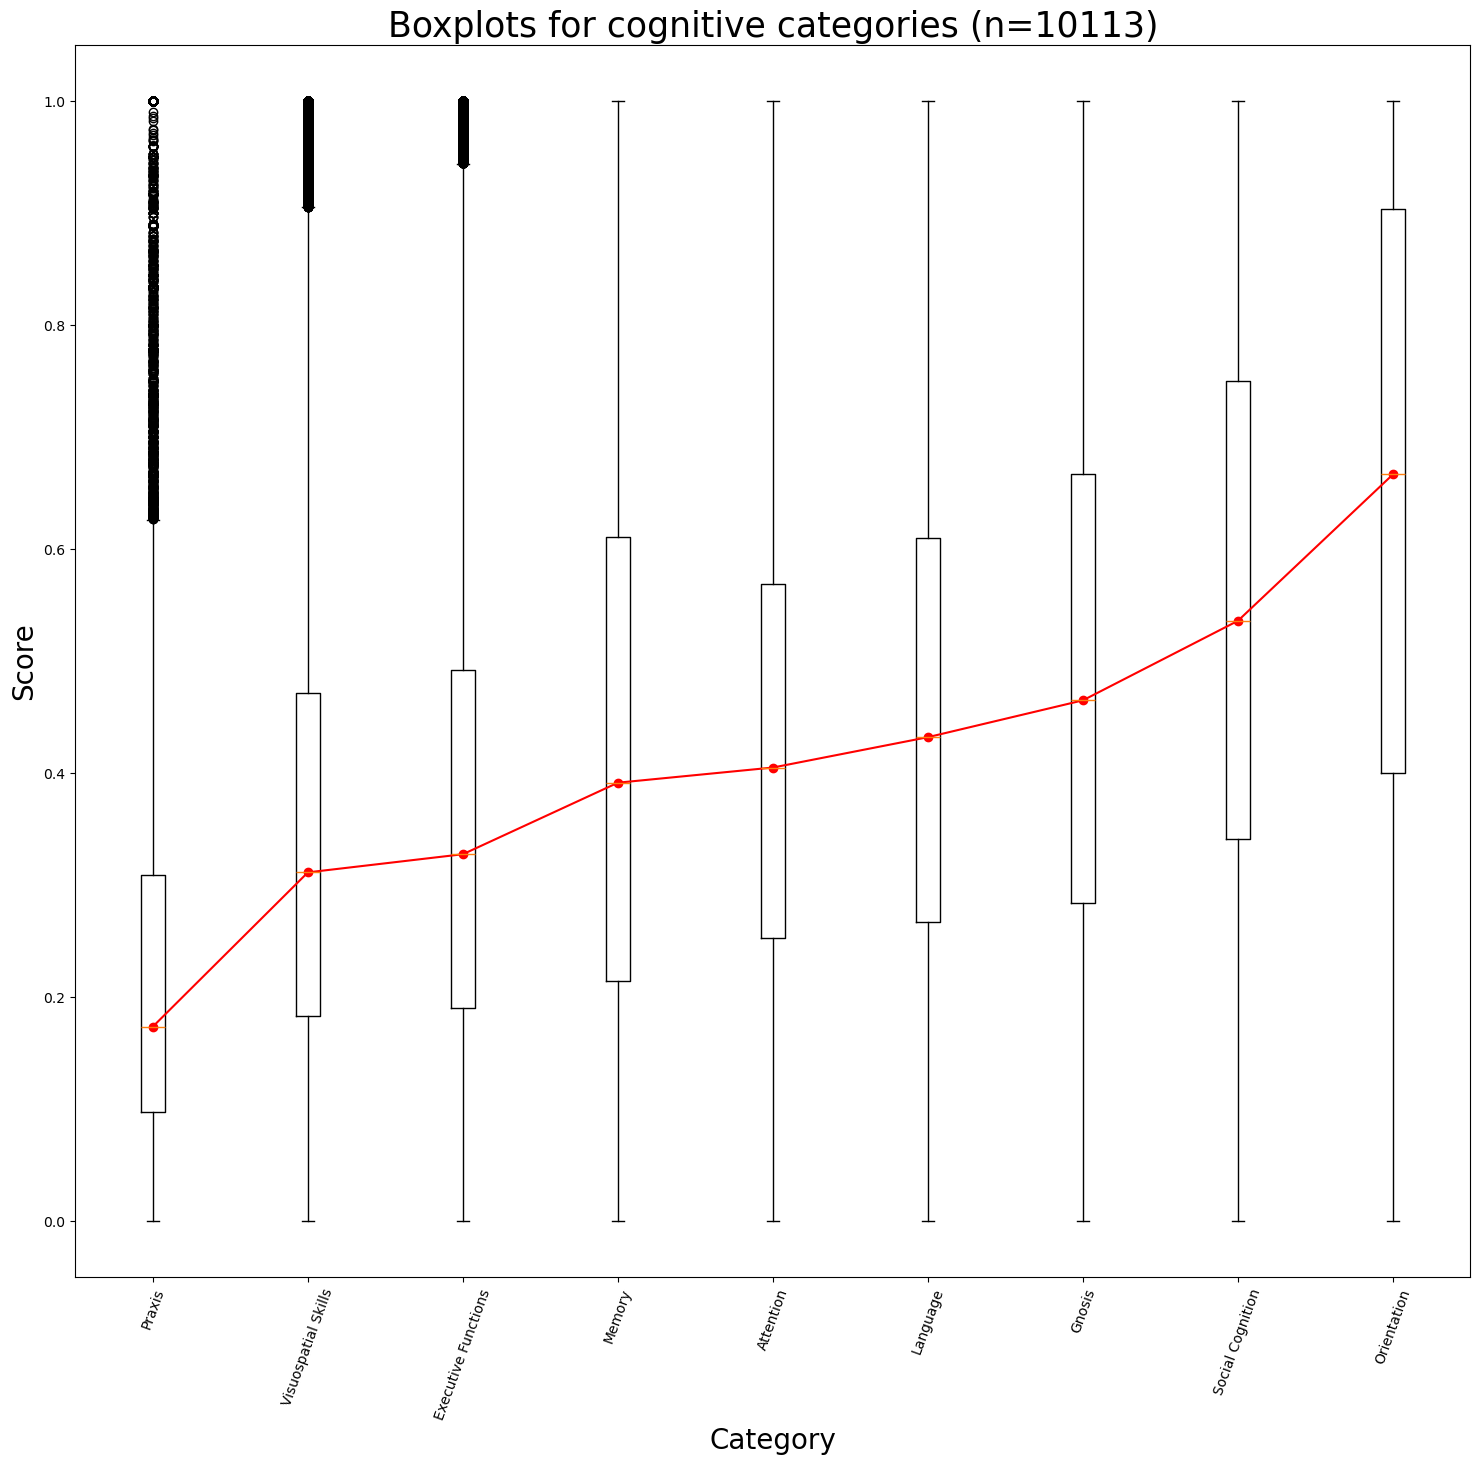

In [15]:
# AREA SCORE BOXPLOTS
areas = df[["Attention", "Executive Functions", "Gnosis", "Language", "Memory", "Orientation", "Praxis", "Visuospatial Skills", "Social Cognition"]]
areas = areas.iloc[:, 0:9]
data_list =[]
for area in areas:
    area_data = {'area': area, 'score': df[area].dropna().tolist()}
    data_list.append(area_data)

areas_df = pd.DataFrame(data_list)

# Sort the areas_df by the median score in ascending order
areas_df['median'] = areas_df['score'].apply(np.median)
areas_df = areas_df.sort_values(by='median', ascending=True)

# Reset the index of the areas_df
areas_df = areas_df.reset_index(drop=True)

# Create a figure and an axis
fig, ax = plt.subplots(figsize=(18,16))

# Plot the boxplots for each area
for i, area_data in areas_df.iterrows():
    ax.boxplot(area_data['score'], positions=[i], labels=[area_data['area']])
    
# Plot a line connecting the medians
ax.plot(areas_df.index, areas_df['median'], color='red', marker='o')

# Set the title, labels, and ticks
ax.set_title('Boxplots for cognitive categories (n=10113)', fontsize=25)
ax.set_xlabel('Category', fontsize=20)
ax.set_xticklabels(labels=areas_df['area'], rotation=70)
ax.set_ylabel('Score', fontsize=20)
# Show the plot
plt.savefig("areabox_7.png")
plt.show()

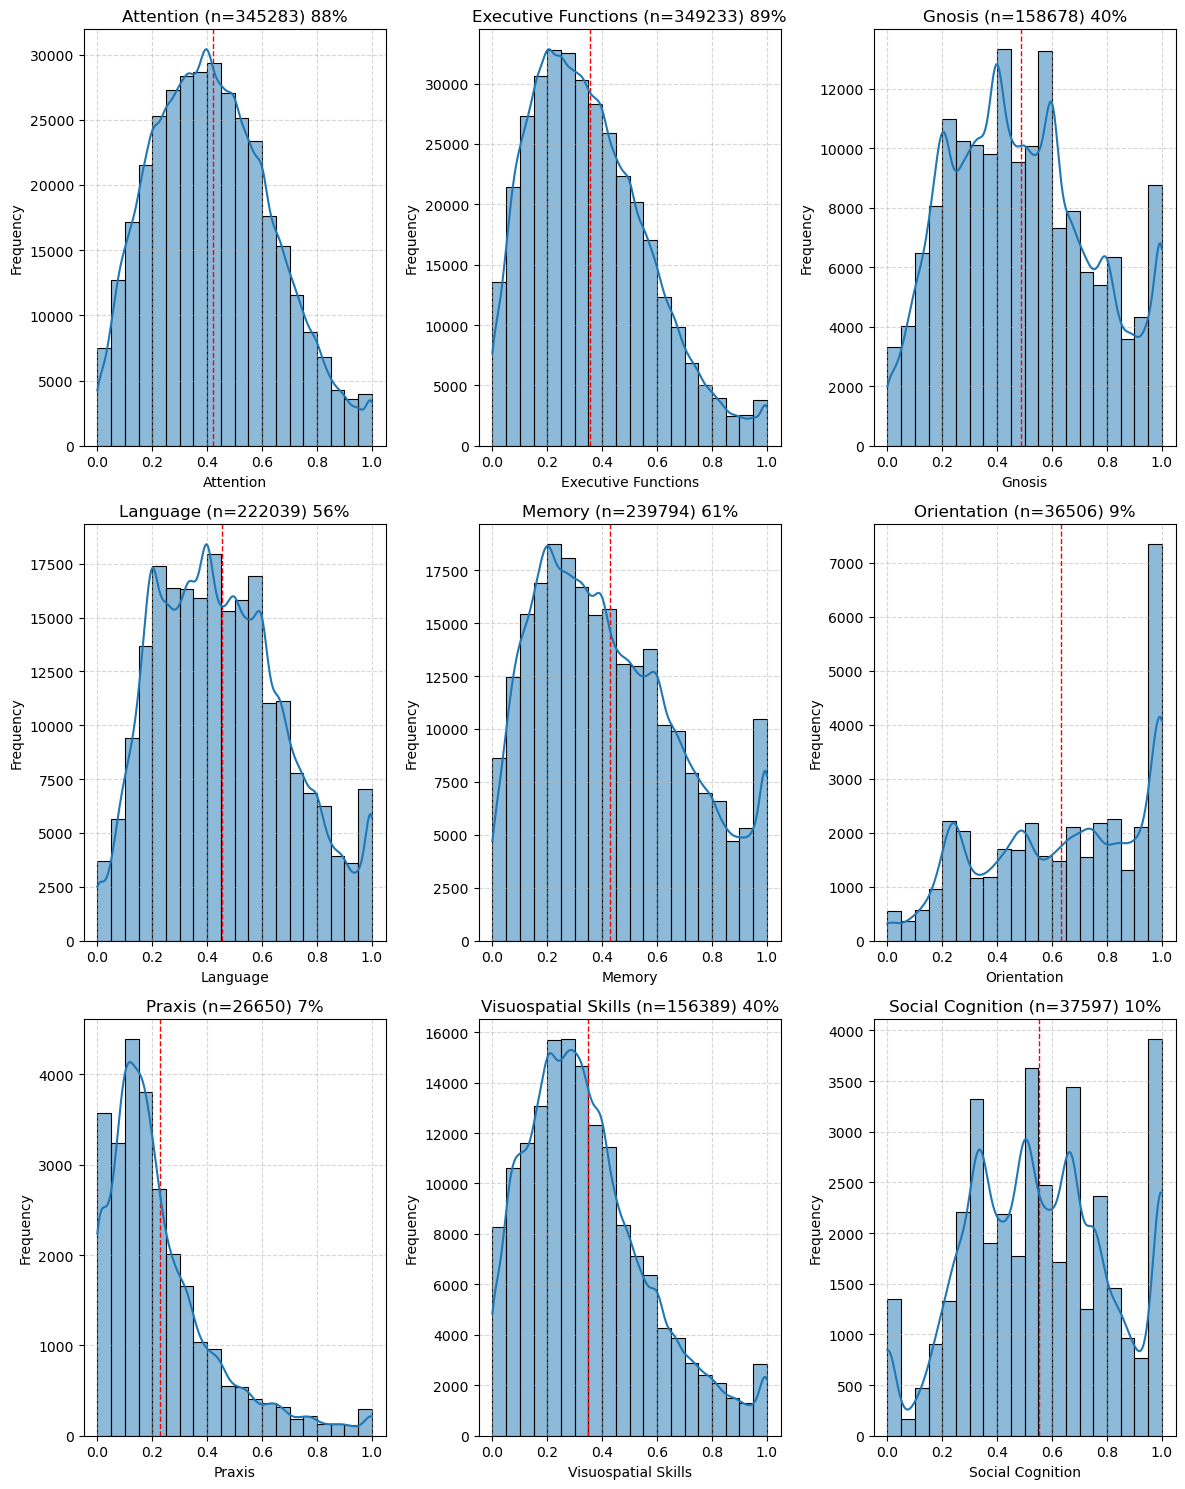

In [22]:
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

# AREA SCORE DISTRIBUTION PLOT
num_columns = df[["Attention", "Executive Functions", "Gnosis", "Language", "Memory", "Orientation", "Praxis", "Visuospatial Skills", "Social Cognition"]]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,15))
fig.subplots_adjust(hspace=0.4, wspace= 0.4)

style = { 'histtype': 'bar', 'edgecolor': 'black', 'alpha': 0.7}

for i, column in enumerate(num_columns):
    row, col = i // 3, i % 3
    ax = axes[row, col]
    
#     df[column].plot(kind='hist', bins=20,**style, ax=ax, 
#   

    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(True, linestyle='--', alpha=0.5) # grid
    
    # vertical line at mean
    mean_value = df[column].mean()
    ax.axvline(mean_value, color='red', linestyle='dashed', linewidth=1)
    
    # KDE curve
    sns.histplot(df[column], ax=ax, kde=True, bins=20)
    ax.set_title(f'{column} (n={df[column].count()}) {round(100*df[column].count()/df.shape[0])}%')

plt.tight_layout()
plt.show()

### 4) Area representation

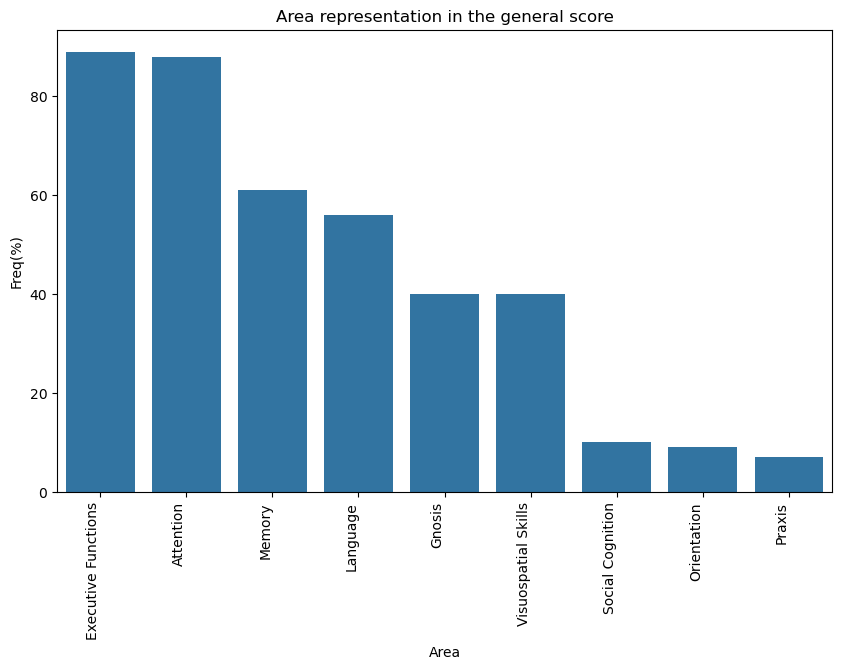

In [23]:
# AREA REPRESENTATION
num_columns = df[["Attention", "Executive Functions", "Gnosis", "Language", "Memory", "Orientation", "Praxis", "Visuospatial Skills", "Social Cognition"]]

area_freq = pd.DataFrame()
area_freq['Area'] = num_columns.columns
area_freq['Freq(%)'] = [round(100*df[column].count()/df.shape[0]) for column in num_columns]

area_freq = area_freq.sort_values("Freq(%)", ascending= False)
area_freq.reset_index(drop=True, inplace=True)

# colors = sns.color_palette('husl', 38)
plt.figure(figsize=(10,6))
ax = sns.barplot(x=area_freq['Area'], y=area_freq['Freq(%)'], color='C0')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.set_title('Area representation in the general score')
plt.show()

In [24]:
# AREA REPRESENTATION IN AGE GROUPS
num_columns = df[["Attention", "Executive Functions", "Gnosis", "Language", "Memory", "Orientation", "Praxis", "Visuospatial Skills", "Social Cognition"]]

ages = df2['age_group'].unique()

age_list = []
for age in ages:
    age_dict = {'age_group': age, 'data' : df2[df2['age_group'] == age]}
    age_list.append(age_dict)
    
area_freq = pd.DataFrame()
area_freq['Area'] = num_columns.columns
area_freq['Children Freq(%)'] = [round(100*age_list[3]['data'][column].count()/age_list[3]['data'].shape[0]) for column in num_columns]
area_freq['Senior Adults Freq(%)'] = [round(100*age_list[1]['data'][column].count()/age_list[1]['data'].shape[0]) for column in num_columns]
area_freq['Middle-Aged Freq(%)'] = [round(100*age_list[0]['data'][column].count()/age_list[0]['data'].shape[0]) for column in num_columns]
area_freq['Young Adults Freq(%)'] = [round(100*age_list[2]['data'][column].count()/age_list[2]['data'].shape[0]) for column in num_columns]
area_freq['Teenagers Freq(%)'] = [round(100*age_list[4]['data'][column].count()/age_list[4]['data'].shape[0]) for column in num_columns]
area_freq['Preescolar Freq(%)'] = [round(100*age_list[6]['data'][column].count()/age_list[6]['data'].shape[0]) for column in num_columns]


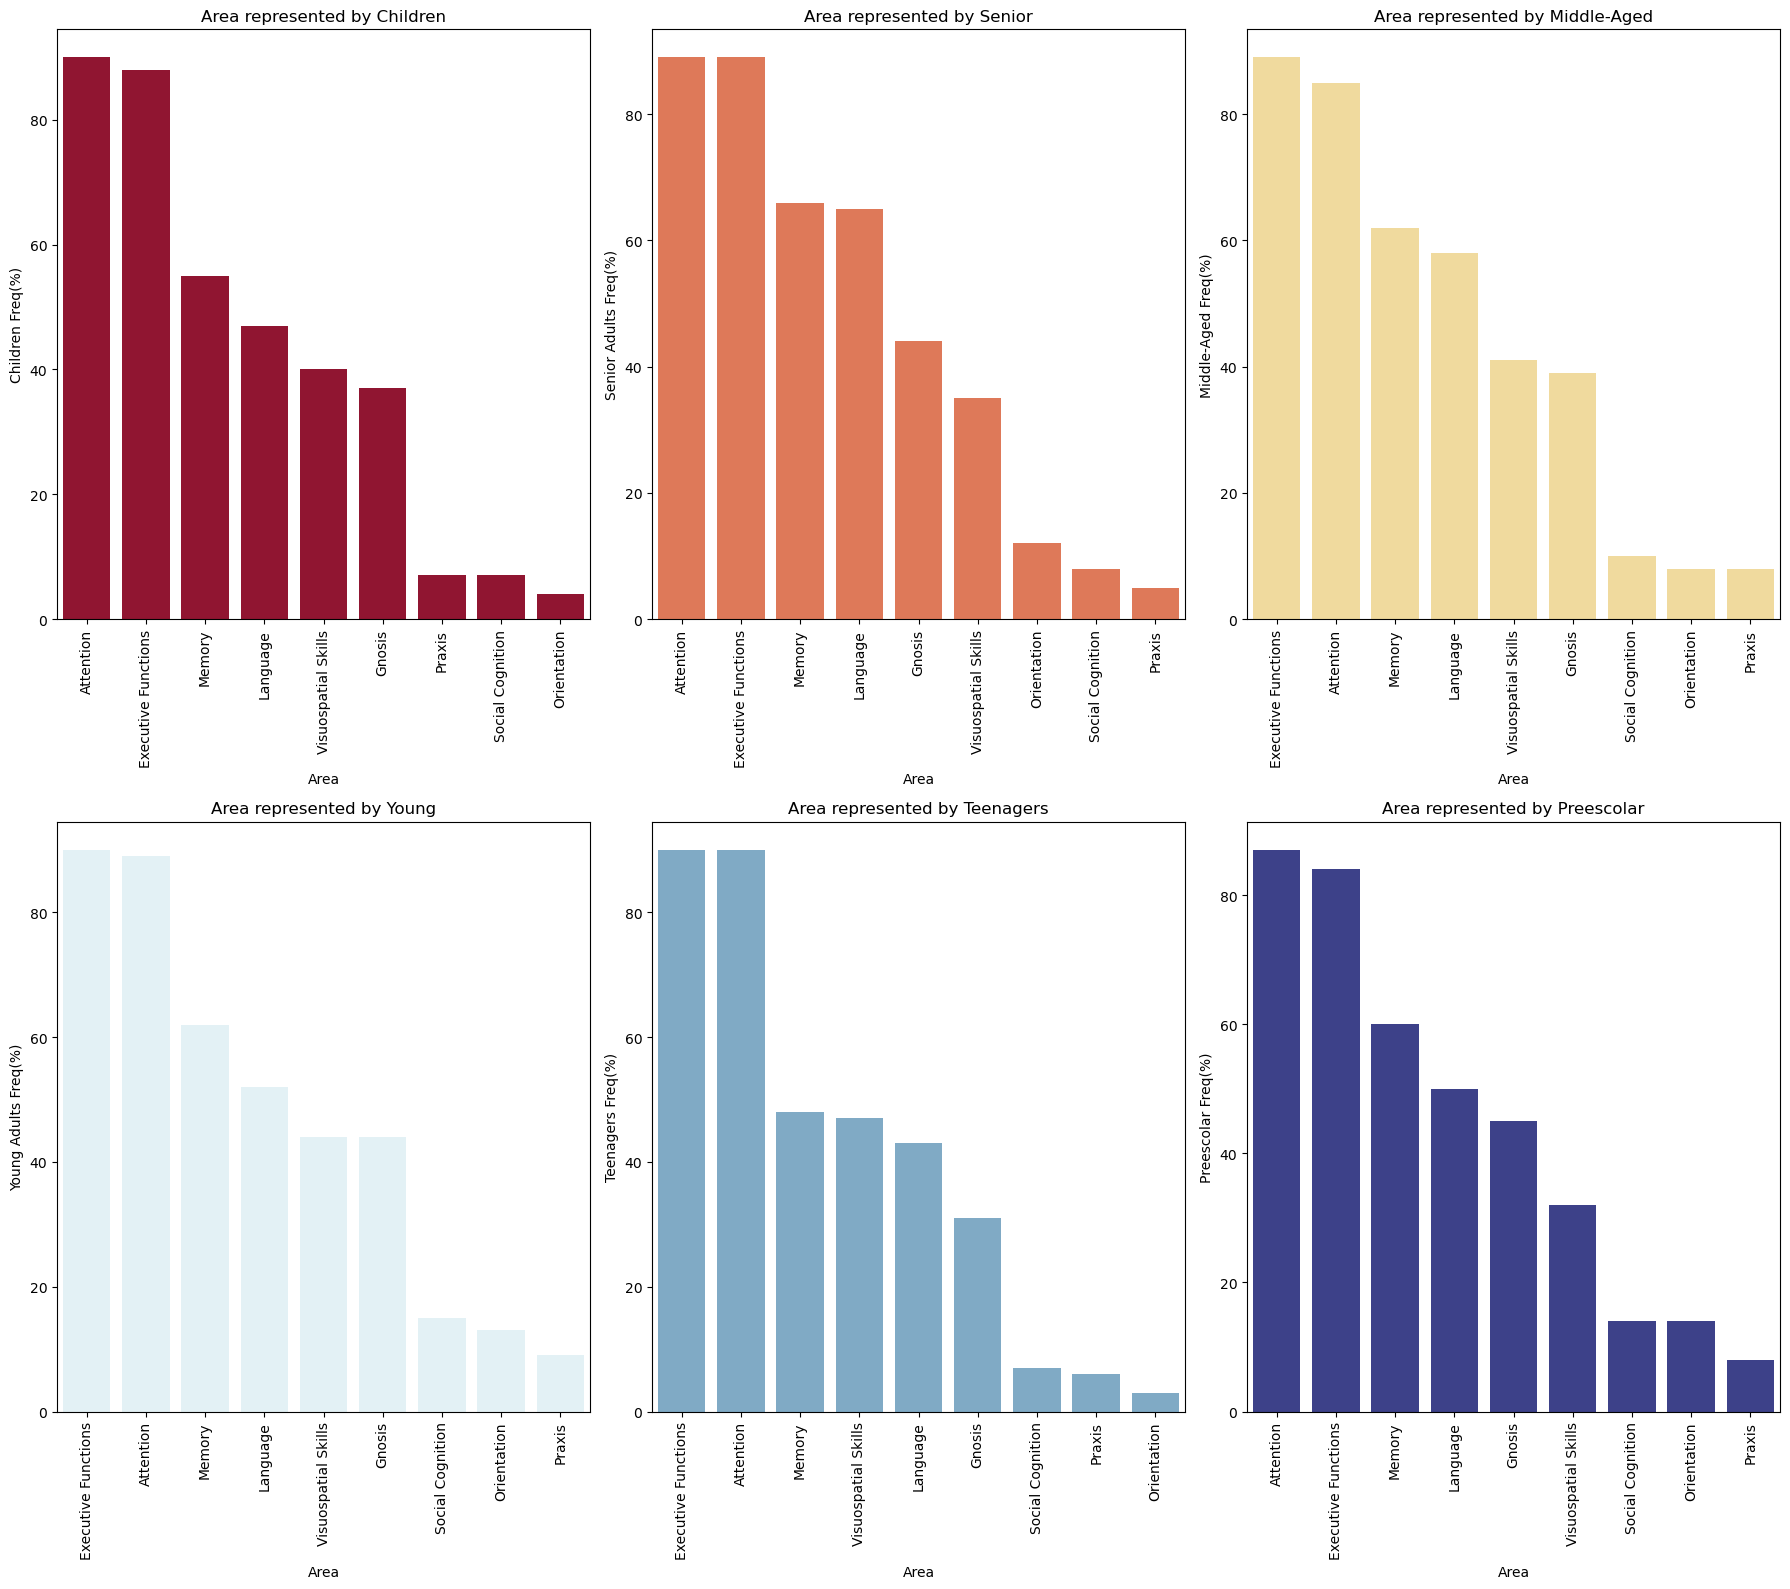

In [25]:
ages = [area_freq.columns[1], area_freq.columns[2], area_freq.columns[3], area_freq.columns[4], area_freq.columns[5], area_freq.columns[6]]
colors = plt.get_cmap('RdYlBu', len(ages))
# first_four_colors = [colors(i) for i in range(4)]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 16))
axes = axes.flatten()

for i, column in enumerate(ages):
    # Plot the bar chart
    area_freq = area_freq.sort_values(column, ascending=False)
    area_freq.reset_index(drop=True, inplace=True)
    sns.barplot(x=area_freq['Area'], y=area_freq[column], color=colors(i), ax=axes[i])
    
    # Set subplot title
    agegroup = column.split()
    axes[i].set_title('Area represented by '+ agegroup[0])
    axes[i].set_xticklabels(rotation=90, labels=area_freq['Area'])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [26]:
# AREA REPRESENTATION IN GENDER
num_columns = df[["Attention", "Executive Functions", "Gnosis", "Language", "Memory", "Orientation", "Praxis", "Visuospatial Skills", "Social Cognition"]]

genders = df['gender'].unique()

genders_list = []
for gender in genders:
    genders_dict = {'gender': gender, 'data' : df[df['gender'] == gender]}
    genders_list.append(genders_dict)
    
area_freq = pd.DataFrame()
area_freq['Area'] = num_columns.columns

area_freq['Male'] = [round(100*genders_list[0]['data'][column].count()/genders_list[0]['data'].shape[0]) for column in num_columns]
area_freq['Female'] = [round(100*genders_list[1]['data'][column].count()/genders_list[1]['data'].shape[0]) for column in num_columns]


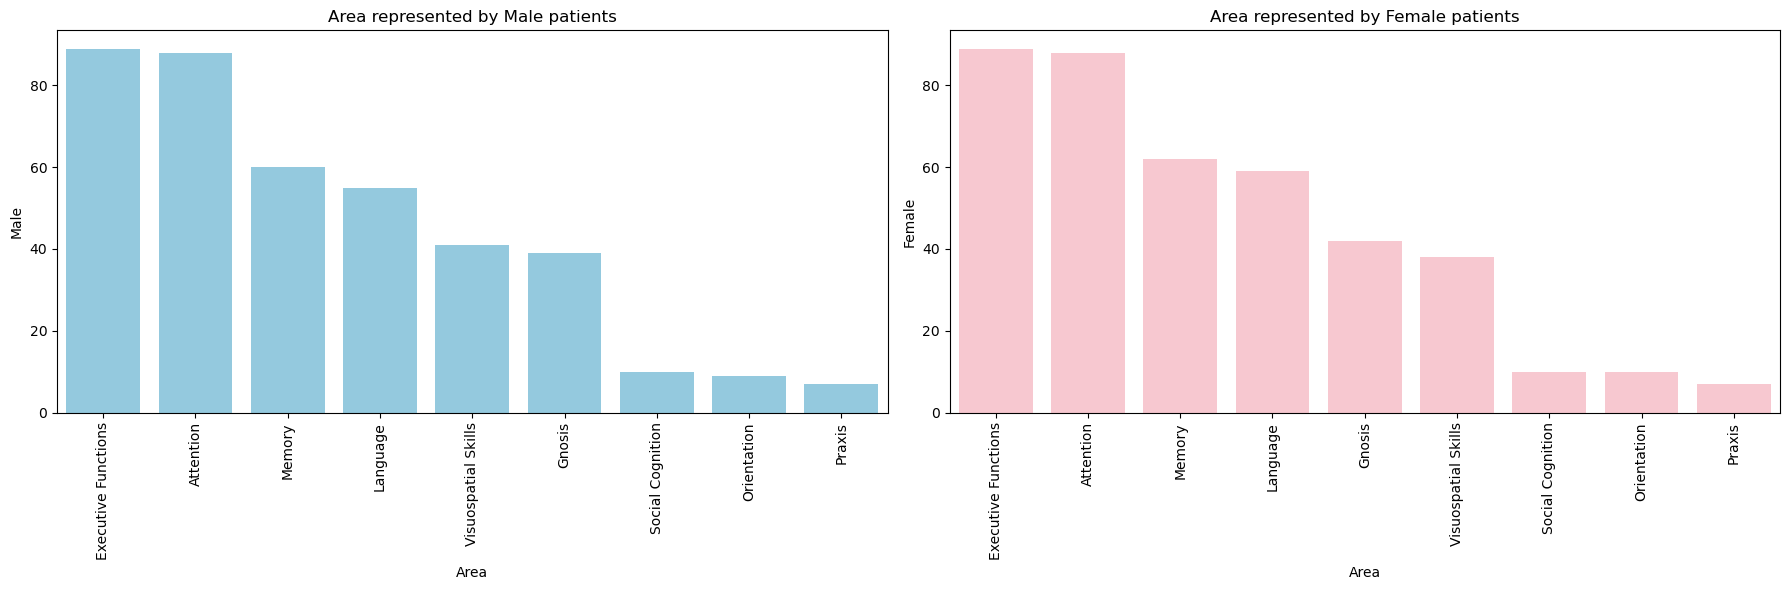

In [27]:
genders = [area_freq.columns[1], area_freq.columns[2]]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
axes = axes.flatten()

colors = ['skyblue', 'pink']
for i, column in enumerate(genders):
    # Plot the bar chart
    area_freq = area_freq.sort_values(column, ascending=False)
    area_freq.reset_index(drop=True, inplace=True)
    sns.barplot(x=area_freq['Area'], y=area_freq[column], color=colors[i], ax=axes[i])
    
    axes[i].set_title('Area represented by '+ column + ' patients')
    axes[i].set_xticklabels(rotation=90, labels=area_freq['Area'])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### 5) Score relationships with age group and gender

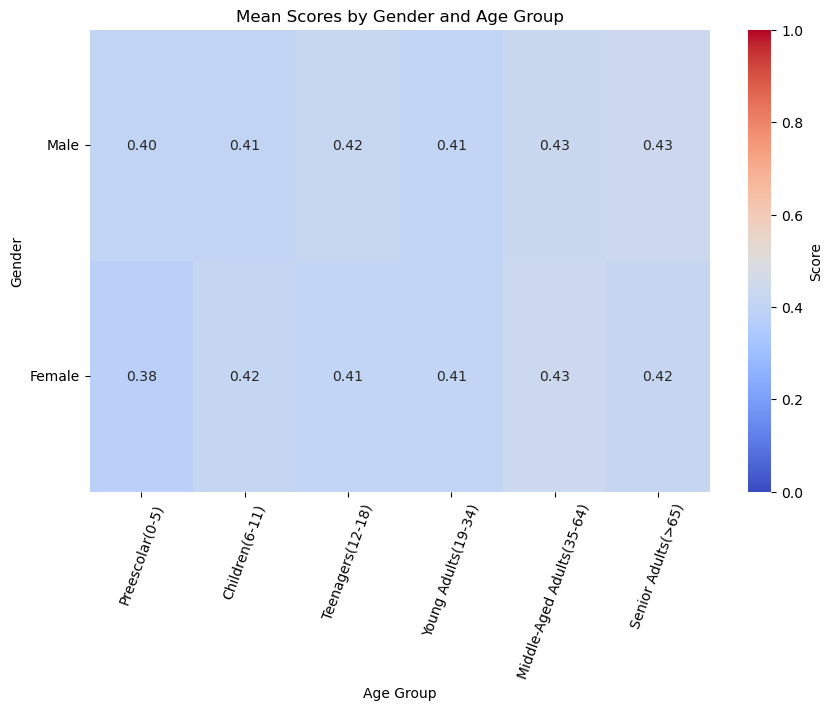

In [29]:
df_rel = df2[['score', 'gender', 'age_group']]
df_grp = df_rel.groupby(['gender', 'age_group'], as_index=False).mean()
df_pivot = df_grp.pivot(index='gender', columns='age_group')

plt.figure(figsize=(10, 6))
sns.heatmap(df_pivot, cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={'label': 'Score'},vmin=0, vmax=1)

plt.xlabel('Age Group')
plt.ylabel('Gender')
plt.xticks(ticks=np.arange(0.5, len(df_pivot.columns)), 
           labels=['Preescolar(0-5)', 'Children(6-11)', 'Teenagers(12-18)', 'Young Adults(19-34)', 'Middle-Aged Adults(35-64)', 'Senior Adults(>65)']
           , rotation=70)
plt.yticks(ticks=np.arange(0.5, len(df_pivot.index)), labels=['Male', 'Female'], rotation=0)
plt.title('Mean Scores by Gender and Age Group')

# Show the plot
plt.show()

### 6) Correlation between score and gender, and score and age_group

In [33]:
# calculate the Spearman correlation between gender and score (1 = male , 2 = female)
corr, p_value = spearmanr(df_rel['gender'], df_rel['score'])

print(f"The Spearman correlation between gender and score is {corr:.2f} with a p-value of {p_value:.2f}.")

The Spearman correlation between gender and score is -0.01 with a p-value of 0.00.


In [34]:
# define the order of the age groups
age_order = ['Preescolar(0-5)', 'Children(6-11)', 'Teenagers(12-18)', 'Young Adults(19-34)', 'Middle-Aged Adults(35-64)', 'Senior Adults(>65)']

# convert the age_group column to an ordered categorical variable
df_rel['age_group'] = pd.Categorical(df_rel['age_group'], categories=age_order, ordered=True)

# calculate the Spearman correlation between age_group and score
corr, p_value = spearmanr(df_rel['age_group'].cat.codes, df_rel['score'])

print(f"The Spearman correlation between age_group and score is {corr:.2f} with a p-value of {p_value:.2f}.")


The Spearman correlation between age_group and score is 0.04 with a p-value of 0.00.


### 7) Area score correlation with general score

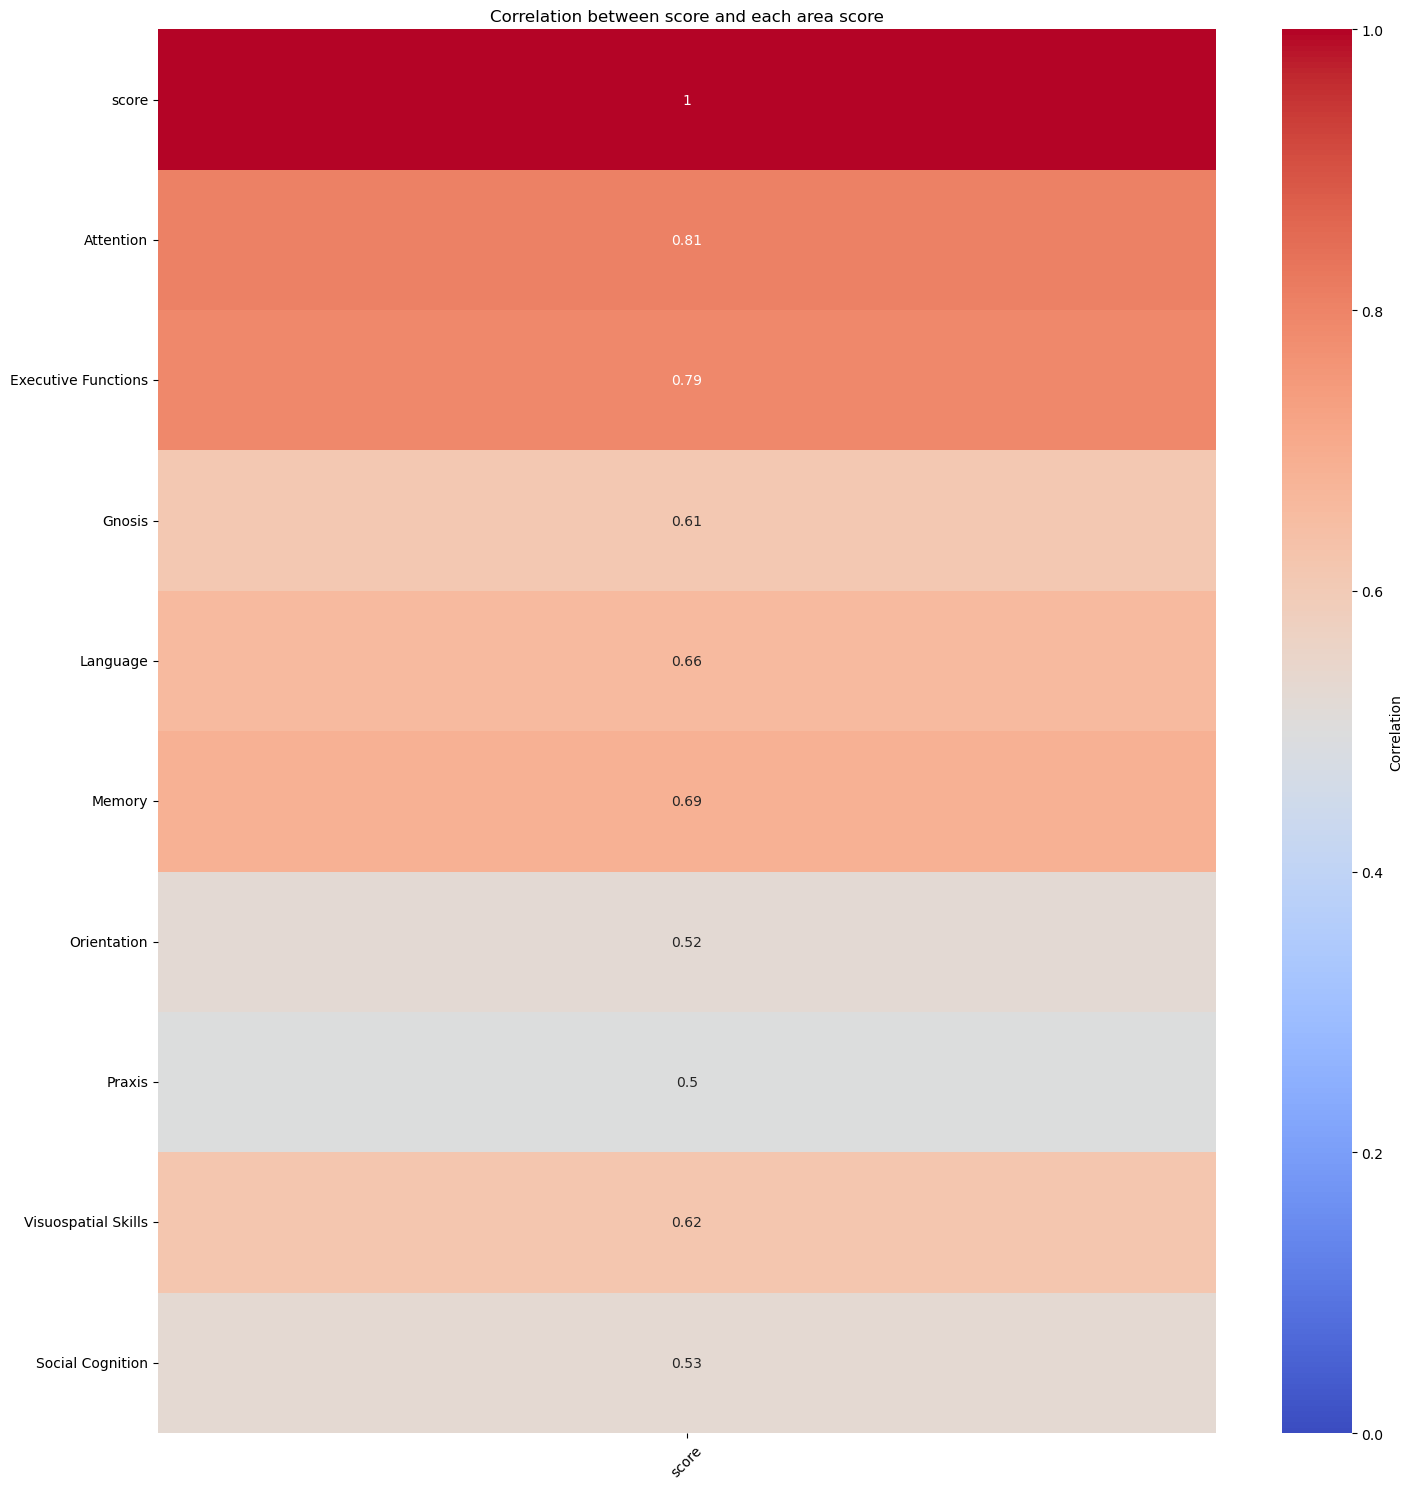

In [28]:
# Assuming 'score' is the column you want to correlate against, and areas are the columns in your DataFrame
areas = df[["Attention", "Executive Functions", "Gnosis", "Language", "Memory", "Orientation", "Praxis", "Visuospatial Skills", "Social Cognition"]].columns

# Calculate correlations
correlations = df[['score'] + list(areas)].corr()

# Create a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlations[['score']], annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation'}, vmin=0, vmax=1)

# Set plot properties
plt.title('Correlation between score and each area score')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

### 8) Patient score evolution

In [61]:
patient_df = df[df['patient_id'] == 4]


In [62]:
# convert the week index to a column
patient_df = patient_df.reset_index()

# split the week column into two columns: week and year
patient_df[['week', 'year']] = patient_df['week'].str.split('-', expand=True)

# convert the week and year columns to integers
patient_df['week'] = patient_df['week'].astype(int)
patient_df['year'] = patient_df['year'].astype(int)

# sort the dataframe by year and week
patient_df = patient_df.sort_values(by=['year', 'week'])

# merge the week and year columns
patient_df['week_year'] = patient_df['week'].astype(str) + '-' + patient_df['year'].astype(str)

# set the week column as the index
patient_df = patient_df.set_index('week_year')

In [63]:
patient_df

,index,patient_id,week,score,gender,birthdate,Alternating Attention,Attention,Auditory Gnosis,Body Schema,...,Sustained Attention,Time Estimation,Time Orientation,Visoconstructive Praxis,Visual Gnosis,Visuospatial Skills,Vocabulary,Working M.,Writing,year
week_year,,,,,,,,,,,,,,,,,,,,,
8-2014,22,4,8,0.2614,2,1950-08-22,NaN,0.3227,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
10-2014,25,4,10,0.3111,2,1950-08-22,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
11-2014,28,4,11,0.4615,2,1950-08-22,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.4615,NaN,NaN,NaN,NaN,2014
12-2014,30,4,12,0.2524,2,1950-08-22,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
13-2014,33,4,13,0.4173,2,1950-08-22,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.5000,NaN,NaN,NaN,0.3733,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41-2021,96,4,41,0.6000,2,1950-08-22,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
43-2021,103,4,43,0.1556,2,1950-08-22,NaN,NaN,0.1111,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
46-2021,110,4,46,0.2000,2,1950-08-22,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021


In [64]:
patient_plot = patient_df['score']
patient_plot.head()

week_year
8-2014     0.2614
10-2014    0.3111
11-2014    0.4615
12-2014    0.2524
13-2014    0.4173
Name: score, dtype: float64

<Axes: xlabel='week_year'>

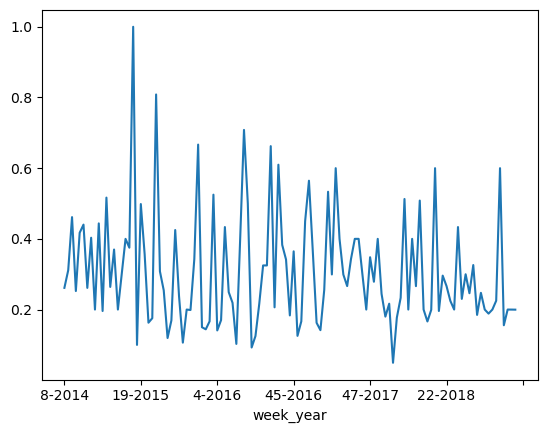

In [65]:
patient_plot.plot(kind='line')